In [83]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# Load dataset
X_orig, y_orig = load_svmlight_file('data/australian_scale')
# data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#australian

# Divide dataset
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_orig, y_orig, test_size=0.2)

# Convert to column vector
X_train = X_train_orig.T.toarray()
X_val = X_val_orig.T.toarray()
y_train = np.reshape(y_train_orig, (1, y_train_orig.shape[0]))
y_val = np.reshape(y_val_orig, (1, y_val_orig.shape[0]))
print(X_train.shape, y_train.shape)

(14, 552) (1, 552)


In [85]:
# 用零初始化参数
def init_parameters_with_zeros(dim):
    W = np.zeros((dim, 1))
    b = 0
    return W, b

In [86]:
# 前向传播和反向传播
def propagate(W, b, X, Y):
    C = 0.9
    m = X.shape[1]

    # 前向传播
    A = np.dot(W.T, X) + b
    

    # 计算cost
    #     cost = np.sum(np.square(A-Y))/m
    cost = np.sum(np.square(W)) / 2 + C * np.sum(np.maximum(0, 1 - Y * (np.dot(W.T, X) + b))) / m

    # 反向传播
    #     filt = np.zeros(Y.shape)
    #     filt[(1-Y*(np.dot(W.T,X)+b))>0]=1
    filt = (1 - Y * (np.dot(W.T, X) + b)) > 0
    #     tmp = tmp.reshape(tmp.shape[1])
    #     print(tmp.shape)
    #     print((np.sum(Y*X*filt,axis=0)).shape)
    #     print((np.sum(Y*X,axis=0)*filt).shape)
    #     print(W.shape,(np.sum(Y*X,axis=0)*filt).shape,'x')
    #     print('W.shape',W.shape)
    #     print('X.shape',X.shape
    #     print('Y.shape',Y.shape,'X.shape',X.shape,'filt.shape',filt.shape)
    #     print((C*np.dot(Y*filt,X.T)/m).shape)
    #     dW = W - C*np.dot(Y,X.T).T/m
    #     db = -C*np.sum(Y*b)/m
    gW = W - C * np.dot(Y * filt, X.T).T / m
    gb = -C * np.sum(Y * filt * b) / m
    #     dW = np.dot(X,(A-Y).T)*2/m
    #     db = np.sum(2*(A-Y))/m
    return cost, gW, gb

In [87]:
def predict(W, b, X):
    m = X.shape[1]
    A = np.dot(W.T, X) + b
    Y_prediction = np.zeros((1, m))
    Y_prediction[A >= 0] = 1
    Y_prediction[A < 0] = -1
    return Y_prediction

In [88]:
def model(X_train, Y_train, X_val, Y_val, num_iterations=200, learning_rate=0.01, print_cost=False):

    # 保存训练集和验证集上的cost、accuracy
    train_cost_log = []
    val_cost_log = []
    train_accuracy_log = []
    val_accuracy_log = []

    # 初始化参数
    W, b = init_parameters_with_zeros(X_train.shape[0])

    for i in range(num_iterations):
        # 进行前向传播、反向传播，计算cost和梯度
        train_cost, gW, gb = propagate(W, b, X_train, Y_train)
        # 计算验证集上的cost
        val_cost, _, _ = propagate(W, b, X_val, Y_val)

        Y_train_prediction = predict(W, b, X_train)
        Y_val_prediction = predict(W, b, X_val)
        train_accuracy = 100 - np.mean(
            np.abs(Y_train_prediction - Y_train) / 2) * 100
        val_accuracy = 100 - np.mean(
            np.abs(Y_val_prediction - Y_val) / 2) * 100

        # 保存cost
        train_cost_log.append(train_cost)
        val_cost_log.append(val_cost)
        train_accuracy_log.append(train_accuracy)
        val_accuracy_log.append(val_accuracy)

        # 更新参数
        #         print("W.shape",W.shape,"gW.shape",gW.shape)
        W = W - learning_rate * gW
        b = b - learning_rate * gb

        if print_cost and i % 10 == 0:
            print(
                "After iteration %i, train cost: %f, val cost : %f， train accuracy: %f %%, test accuracy: %f %%"
                % (i, train_cost, val_cost, train_accuracy, val_accuracy))

    return W, b, train_cost_log, val_cost_log, train_accuracy_log, val_accuracy_log

In [89]:
_, _, train_loss_log, val_loss_log, train_accuracy_log, val_accuracy_log = model(X_train, y_train, X_val, y_val, print_cost=True)

After iteration 0, train cost: 0.900000, val cost : 0.900000， train accuracy: 44.927536 %, test accuracy: 42.753623 %
After iteration 10, train cost: 0.832393, val cost : 0.833789， train accuracy: 82.246377 %, test accuracy: 83.333333 %
After iteration 20, train cost: 0.777097, val cost : 0.779755， train accuracy: 82.246377 %, test accuracy: 83.333333 %
After iteration 30, train cost: 0.731870, val cost : 0.735670， train accuracy: 82.246377 %, test accuracy: 83.333333 %
After iteration 40, train cost: 0.694879, val cost : 0.699711， train accuracy: 82.246377 %, test accuracy: 83.333333 %
After iteration 50, train cost: 0.664623, val cost : 0.670389， train accuracy: 82.246377 %, test accuracy: 83.333333 %
After iteration 60, train cost: 0.639877, val cost : 0.646487， train accuracy: 82.246377 %, test accuracy: 83.333333 %
After iteration 70, train cost: 0.621178, val cost : 0.628071， train accuracy: 82.246377 %, test accuracy: 83.333333 %
After iteration 80, train cost: 0.611376, val cos

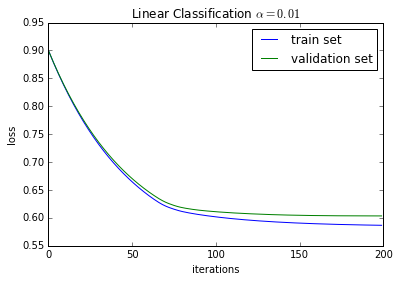

In [90]:
# 画图
plt.plot(train_loss_log, label='train set')
plt.plot(val_loss_log, label='validation set')

plt.legend()  # 图例
# plt.axis([0,200,0,1])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title(r'Linear Classification $\alpha=0.01$')
# plt.show()
plt.savefig('linear_classification_loss.eps', format='eps', dpi=1000)

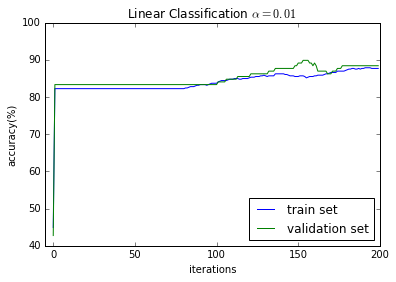

In [91]:
# 画图
plt.plot(train_accuracy_log, label='train set')
plt.plot(val_accuracy_log, label='validation set')

plt.legend(loc='lower right')  # 图例
plt.axis([-5, 200, 40, 100])
plt.ylabel('accuracy(%)')
plt.xlabel('iterations')
plt.title(r'Linear Classification $\alpha=0.01$')
# plt.show()
plt.savefig('linear_classification_accuracy.eps', format='eps', dpi=1000)

In [92]:
_, _, _, loss_learning_rate_003, _, _ = model(X_train, y_train, X_val, y_val, num_iterations=500, learning_rate=0.03)
_, _, _, loss_learning_rate_001, _, _ = model(X_train, y_train, X_val, y_val, num_iterations=500, learning_rate=0.01)
_, _, _, loss_learning_rate_0003, _, _ = model(X_train, y_train, X_val, y_val, num_iterations=500, learning_rate=0.003)
# _,_,_,loss_learning_rate_0001,_,_ = model(X_train,y_train,X_val,y_val,num_iterations = 500,learning_rate = 0.001)
# _,_,_,loss_learning_rate_00003,_,_ = model(X_train,y_train,X_val,y_val,num_iterations = 500,learning_rate = 0.0003)
# _,_,_,loss_learning_rate_00001,_,_ = model(X_train,y_train,X_val,y_val,learning_rate = 0.0001)
# _,_,_,loss_learning_rate_000003,_,_ = model(X_train,y_train,X_val,y_val,learning_rate = 0.00003)
# _,_,_,loss_learning_rate_000001,_,_ = model(X_train,y_train,X_val,y_val,learning_rate = 0.00001)

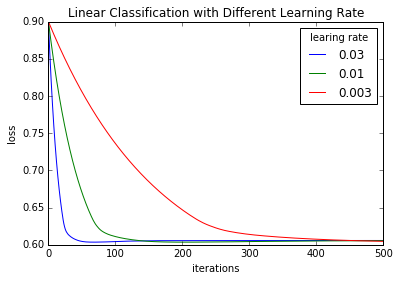

In [93]:
plt.plot(loss_learning_rate_003, label='0.03')
plt.plot(loss_learning_rate_001, label='0.01')
plt.plot(loss_learning_rate_0003, label='0.003')
# plt.plot(loss_learning_rate_0001, label='0.001')
# plt.plot(loss_learning_rate_00003, label='0.0003')
# plt.plot(loss_learning_rate_00001, label='0.0001')
# plt.plot(loss_learning_rate_000003, label='0.00003')
# plt.plot(loss_learning_rate_000001, label='0.00001')

plt.legend(title='learing rate')
# plt.axis([0,200,0,1500])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('Linear Classification with Different Learning Rate')
# plt.show()
plt.savefig('linear_classification_loss_with_different_learning_rate.eps', format='eps', dpi=1000)

In [94]:
_, _, _, _, _, accuracy_learning_rate_003 = model(X_train, y_train, X_val, y_val, num_iterations=500, learning_rate=0.03)
_, _, _, _, _, accuracy_learning_rate_001 = model(X_train, y_train, X_val, y_val, num_iterations=500, learning_rate=0.01)
_, _, _, _, _, accuracy_learning_rate_0003 = model(X_train, y_train, X_val, y_val, num_iterations=500, learning_rate=0.003)
# _,_,_,_,_,accuracy_learning_rate_0001 = model(X_train,y_train,X_val,y_val,num_iterations = 500,learning_rate = 0.001)
# _,_,_,loss_learning_rate_00003 = model(X_train,y_train,X_val,y_val,num_iterations = 500,learning_rate = 0.0003)
# _,_,_,loss_learning_rate_00001 = model(X_train,y_train,X_val,y_val,learning_rate = 0.0001)
# _,_,_,loss_learning_rate_000003 = model(X_train,y_train,X_val,y_val,learning_rate = 0.00003)
# _,_,_,loss_learning_rate_000001 = model(X_train,y_train,X_val,y_val,learning_rate = 0.00001)

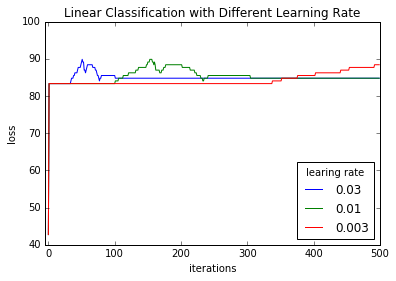

In [95]:
plt.plot(accuracy_learning_rate_003, label='0.03')
plt.plot(accuracy_learning_rate_001, label='0.01')
plt.plot(accuracy_learning_rate_0003, label='0.003')
# plt.plot(accuracy_learning_rate_0001, label='0.001')
# plt.plot(loss_learning_rate_00003, label='0.0003')
# plt.plot(loss_learning_rate_00001, label='0.0001')
# plt.plot(loss_learning_rate_000003, label='0.00003')
# plt.plot(loss_learning_rate_000001, label='0.00001')

plt.legend(title='learing rate',loc='lower right')
plt.axis([-5, 500, 40, 100])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('Linear Classification with Different Learning Rate')
# plt.show()
plt.savefig('linear_classification_accuracy_with_different_learning_rate.eps', format='eps', dpi=1000)